In [2]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
# a hack from stackoverflow to normalize the colorbar and set arbitrary midpoint locations
# while maintaining the colorbar's linearity
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

In [4]:
af = np.loadtxt('LHS_af.csv', delimiter=',')
rr = np.loadtxt('robustness.csv', delimiter=',')

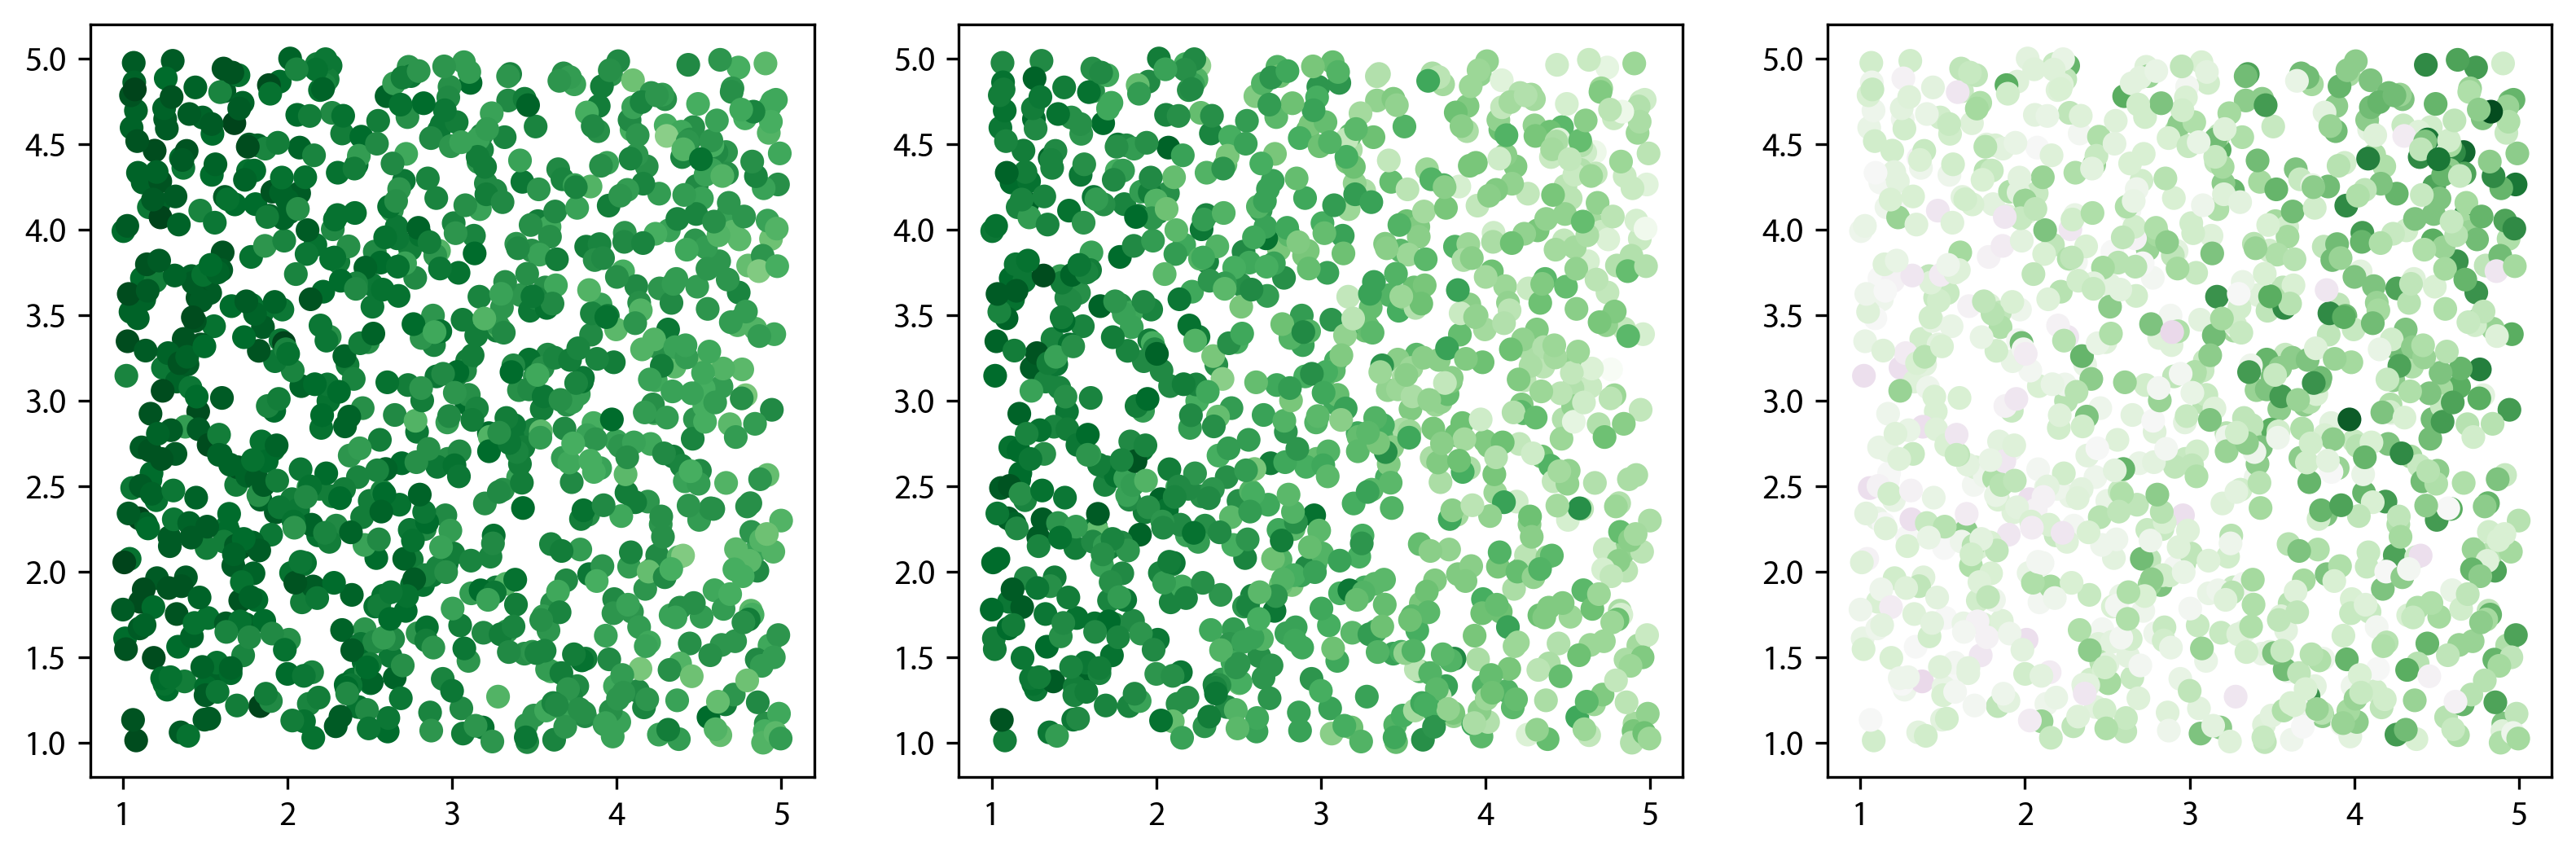

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].scatter(af[:, 0], af[:, 1], c=rr[:,0], cmap='Greens', vmin = 59, vmax = 100)
ax[1].scatter(af[:, 0], af[:, 1], c=rr[:,1], cmap='Greens', vmin = 59, vmax = 100)
ax[2].scatter(af[:, 0], af[:, 1], c=rr[:,0]-rr[:,1], cmap='PRGn', norm=MidpointNormalize(vmin=-5, vmax=30, midpoint=0))

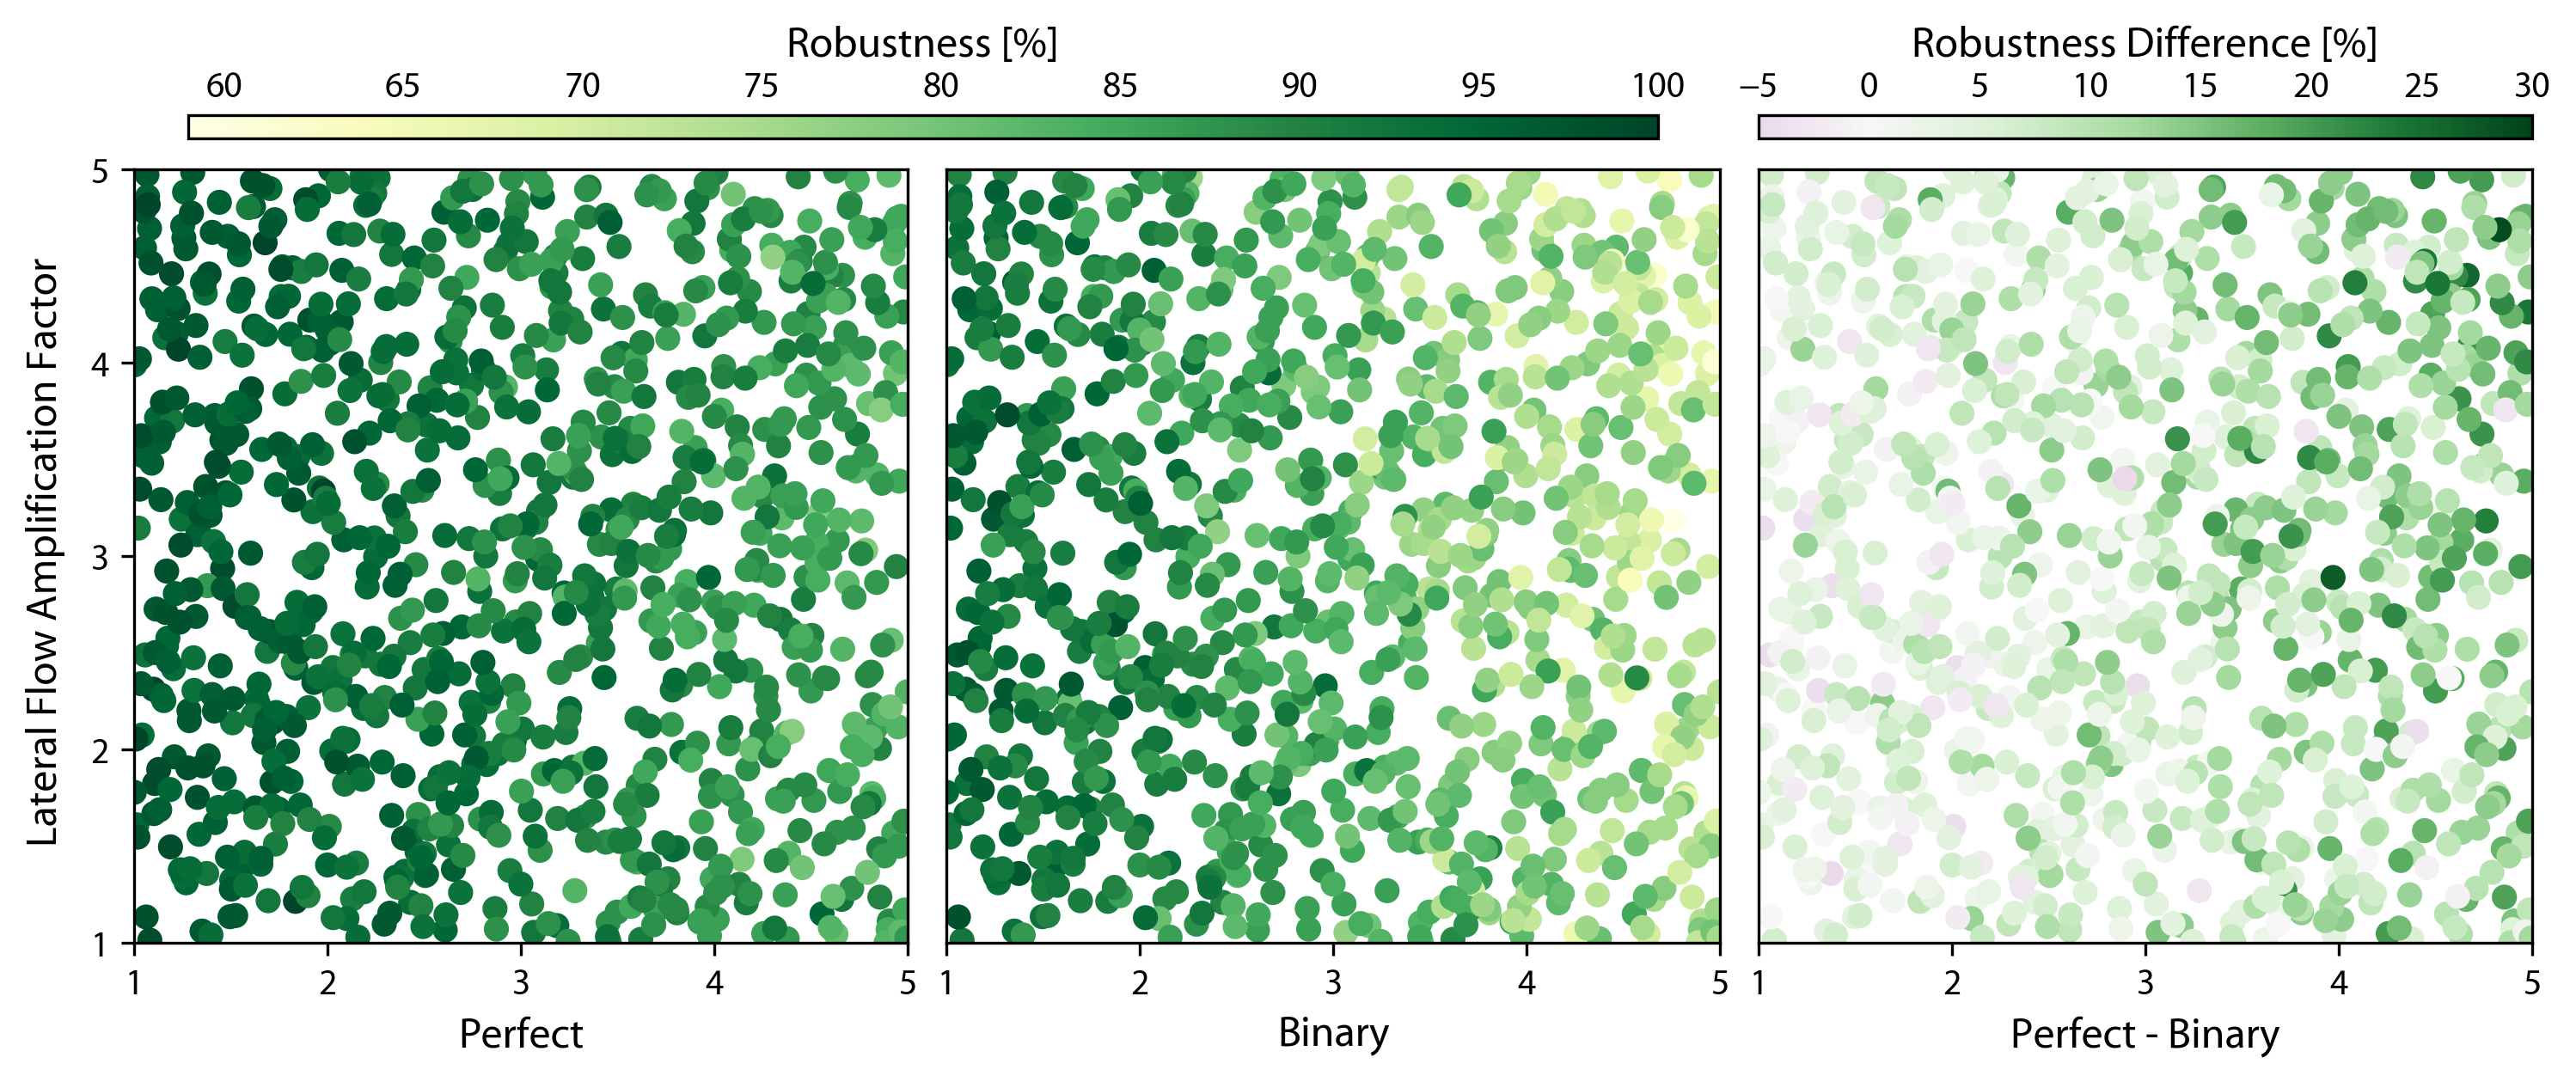

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1]})

# Scatter plots
scatter1 = ax[0].scatter(af[:, 0], af[:, 1], c=rr[:, 0], cmap='YlGn', vmin=59, vmax=100)
scatter2 = ax[1].scatter(af[:, 0], af[:, 1], c=rr[:, 1], cmap='YlGn', vmin=59, vmax=100)
scatter3 = ax[2].scatter(af[:, 0], af[:, 1], c=rr[:, 0] - rr[:, 1], cmap='PRGn', norm=MidpointNormalize(vmin=-5, vmax=30, midpoint=0))

# Setting the aspect ratio to be 1 (square)
for ax_ in ax:
    ax_.set_aspect('equal')
    ax_.set_xlim(1, 5)
    ax_.set_ylim(1, 5)

# Set shared YTicks and YTicklabels for all subplots
ax[0].set_yticks(np.arange(1, 6, 1))
ax[0].set_yticklabels(np.arange(1, 6, 1))
ax[1].set_yticks([])
ax[2].set_yticks([])

# Set shared Xlabel for all subplots
for ax_ in ax:
    ax_.set_xticks(np.arange(1, 6, 1))
ax[0].set_xlabel('Perfect', fontsize=12)
ax[1].set_xlabel('Binary', fontsize=12)
ax[2].set_xlabel('Perfect - Binary', fontsize=12)

# Add colorbars using inset_axes, positioned directly above each subplot
cax1 = inset_axes(ax[0], width="100%", height="5%", loc='upper center', bbox_to_anchor=(0.07, 0.47, 1.9, 0.6), bbox_transform=ax[0].transAxes, borderpad=0)
cax2 = inset_axes(ax[2], width="100%", height="5%", loc='upper center', bbox_to_anchor=(0.0, 0.47, 1, 0.6), bbox_transform=ax[2].transAxes, borderpad=0)

# Adding colorbars
cbar1 = plt.colorbar(scatter1, cax=cax1, orientation='horizontal')
cbar2 = plt.colorbar(scatter3, cax=cax2, orientation='horizontal')

cbar1.set_label('Robustness [%]', fontsize=12)
cbar1.ax.tick_params(labelsize=10, length=0)

cbar2.set_label('Robustness Difference [%]', fontsize=12)
cbar2.ax.tick_params(labelsize=10, length=0)

# Move colorbars to the top
cbar1.ax.xaxis.set_ticks_position('top')
cbar1.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_label_position('top')

# Set common ylabel for all subplots
fig.text(0.09, 0.5, 'Lateral Flow Amplification Factor', va='center', rotation='vertical', fontsize=12)

# Adjust layout for better visualization
plt.subplots_adjust(wspace=0.05)

plt.show()